In [1]:
#!pip install scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [15]:
df_num = pd.read_csv('files_for_lab/numerical.csv')
df_num.columns = df_num.columns.str.lower().str.replace(' ', '_')
df_num

,tcode,age,income,wealth1,hit,malemili,malevet,vietvets,wwiivets,localgov,...,cardgift,minramnt,maxramnt,lastgift,timelag,avggift,controln,hphone_d,rfa_2f,cluster2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [16]:
df_cat = pd.read_csv('files_for_lab/categorical.csv')
df_cat.columns = df_cat.columns.str.lower().str.replace(' ', '_')
df_cat

,state,cluster,homeownr,gender,datasrce,rfa_2r,rfa_2a,geocode2,domain_a,domain_b,...,dob_yr,dob_mm,minrdate_yr,minrdate_mm,maxrdate_yr,maxrdate_mm,lastdate_yr,lastdate_mm,firstdate_yr,firstdate_mm
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [17]:
df_target = pd.read_csv('files_for_lab/target.csv')
df_target.columns = df_target.columns.str.lower().str.replace(' ', '_')
df_target

,target_b,target_d
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


### encode the categorical variables

In [18]:
df_cat_dummies = pd.get_dummies(df_cat, columns=df_cat.columns.tolist())
df_cat_dummies

,state_CA,state_FL,state_GA,state_IL,state_IN,state_MI,state_MO,state_NC,state_TX,state_WA,...,firstdate_mm_3,firstdate_mm_4,firstdate_mm_5,firstdate_mm_6,firstdate_mm_7,firstdate_mm_8,firstdate_mm_9,firstdate_mm_10,firstdate_mm_11,firstdate_mm_12
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95410,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
X = pd.concat([df_num, df_cat_dummies], axis=1)
y = df_target['target_b']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### upscaling the data using SMOTE

In [21]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

0    63369
1    63369
Name: target_b, dtype: int64

### Apply the Random Forests algorithm

In [25]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9502515371716043


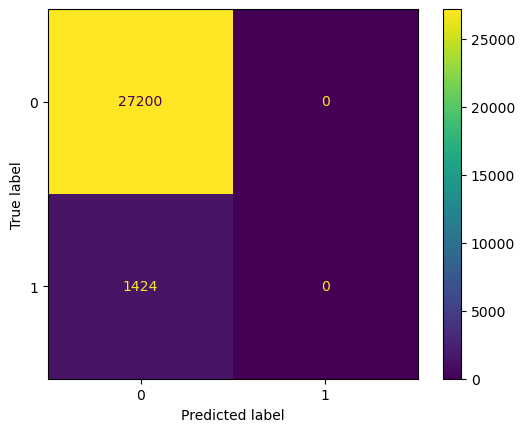

In [35]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();